# Clustering FOOD In Singapore
## Applied Data Science Capstone Week 5 Peer-Graded Project Report
By Troy Lee April 2019


## Introduction to the Opportunity: WHERE TO EAT IN SINGPORE!

Singapore is famous for its cleanliness, garden city and efficient government. It welcomed 18.5 million tourists into the country in 2018. However, what is less known is that it is also a food paradise, where all kinds of food can be found, due to its cosmopolitan city nature. What is most important, at least for me is that, I can get all of these delicious food for cheap.

# Welcome to Singapore:

 
![alt text](https://media2.trover.com/T/5a61c1e084b863716b055775/fixedw_large_4x.jpg "Logo Title Text 1")

# Some Food From Singapore:

 
![alt text](http://danielfooddiary.com/wp-content/uploads/2015/07/singaporefoodbloggers.jpeg "Logo Title Text 1")

I am living in Australia right now and it costs me AUD15 at least, to get a decent meal. When I go back home, it costs me AUD5 to get a decent meal. I am always thinking about food from Singapore, even as I'm doing this project, hence I would like to share some of my joy with you. I want you to have an unforgettable palate experience when you visit Singapore. (Ok, maybe the weather is too warm and humid, compared to Brisbane.)


There is so much food to eat in Singapore, and for tourists without enough time in Singapore, they might miss out! 

The objective of this project is to help tourists find the most authentic yet diverse food in Singapore if they only have 3 days in Singapore. That would mean on average 9 meals. Certain tourists have more disposable income to spend, and other tourists, like me, will try to eat the most local and cheap food when I travel. This recommendation will target both sets of tourists. The hawker centre locations will recommend more diverse, delicious and cheap food, but sometimes reviews of its awesomeness are not online. However, most of the reviews of restaurants (different from hawker centres) can be found online. I refuse to believe that the more expensive food will mean better quality. Quality of local food means authenticity for me, it is high quality food if I find many locals queuing up for the food.


If you are reading this and you are planning to go to Singapore one day, you are in for a treat!




## Required Data

The Foursquare API will be used to pull the following location data on restaurants in Singapore:

Venue Name
Venue ID
Venue Location
Venue Category
Count of Likes

## Data Acquisition Approach

To acquire the data mentioned above, the following is done:


Get geolocator lat and long coordinates for Singapore

Use Foursquare API to get a list of all venues in Singapore

Get venue name, venue ID, location, category, and likes

Obtain hawker centres locations from Singapore's open data: https://data.gov.sg/dataset/list-of-government-markets-hawker-centres


## Algorithm Used

The gathered data will be used to create a k-means clustering algorithm that groups restaurants into 4 clusters so that people looking to eat in Singapore can easily see which restaurants are the best to eat at, what cuisine is available and where in Singapore they can look to eat. Some pictures of the food will be introduced and I will leave some comments for you if I have eaten there.

Warning: k-means clustering might bring about slightly inefficient results, which I will comment on later.

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

# Finding the Geo Data for Singapore
Determining the geographic data of Singapore so it can be pulled from FourSquare.


In [5]:
address = 'Singapore'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Singapore are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.19.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinates of Singapore are 1.3408528, 103.878446863736.


In [6]:

LIMIT = 500
radius = 10000
CLIENT_ID = 'APLB00CYTRCHYGPLBMZVR114O1LX34W0AGQLO4HYPI5CCKQW'
CLIENT_SECRET = 'HVE35SJ45Z0BZSDDGBBWQBSAWQIX55KIRUQABAEMR55T1PNP'
VERSION = '20190413'
neighborhood_latitude = 1.3408528
neighborhood_longitude = 103.878446863736

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
   CLIENT_ID,
   CLIENT_SECRET,
   VERSION,
   neighborhood_latitude,
   neighborhood_longitude,
   radius,
   LIMIT)
url

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbb0ade351e3d3ef712a8f3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Singapore',
  'headerFullLocation': 'Singapore',
  'headerLocationGranularity': 'city',
  'totalResults': 238,
  'suggestedBounds': {'ne': {'lat': 1.4308528900000899,
    'lng': 103.96830351792973},
   'sw': {'lat': 1.25085270999991, 'lng': 103.78859020954228}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ea3aae86c25b62f3deaf9a6',
       'name': 'Alfero Gelato',
       'location': {'address': '81 MacPherson Lane #01-37',
        'lat': 1.3318043299419602,
        'lng': 103.88627736345998,
        'labeledLatLngs': [{'label': 'display',
          'lat': 1.3318043299

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) #flatten JSON

# Filter columns
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# Filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

# Pull the actual data from the Foursquare API


nearby_venues

,name,id,categories,lat,lng
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028
3,Sheng Siong Supermarket,4bcc6df73740b7130bf56365,Supermarket,1.321521,103.859654
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374


## Categorizing The Places and Filtering For Restaurants

In [8]:
nearby_venues['categories'].unique()

array(['Ice Cream Shop', 'Chinese Restaurant', 'Supermarket',
       'Indian Restaurant', 'Cantonese Restaurant', 'Dessert Shop',
       'Food Court', 'Coffee Shop', 'Park', 'Bar', 'Pool',
       'Vietnamese Restaurant', 'Vegetarian / Vegan Restaurant',
       'Cocktail Bar', 'Reservoir', 'Multiplex', 'Italian Restaurant',
       'Trail', 'Hotel', 'Indonesian Restaurant', 'Bakery',
       'Sporting Goods Shop', 'Golf Course', 'Deli / Bodega',
       'Ramen Restaurant', 'Whisky Bar', 'Peruvian Restaurant',
       'Theme Park Ride / Attraction', 'Buffet', 'Museum', 'Art Gallery',
       'Asian Restaurant', 'Japanese Restaurant', 'Electronics Store',
       'Middle Eastern Restaurant', 'Bookstore', 'Performing Arts Venue',
       'Event Space', 'Theater', 'Lounge', 'Speakeasy',
       'General Entertainment', 'Movie Theater', 'Plaza', 'Beach',
       'French Restaurant', 'Botanical Garden', 'Garden', 'Boutique',
       'Art Museum', 'Café', 'Dumpling Restaurant', 'Hotel Pool',
       'Sus

## Removing The Places That Cannot Fill Your Stomach & Satisfy Your Cravings

In [9]:
removal_list = ['Supermarket', 'Park', 'Pool', 'Reservoir', 'Multiplex', 'Trail', 'Hotel', 'Sporting Goods Shop', 'Golf Course',
                'Deli / Bodega','Theme Park Ride / Attraction', 'Museum', 'Art Gallery', 'Electronics Store', 'Bookstore', 'Performing Arts Venue',
                'Event Space', 'Theater', 'Lounge', 'Speakeasy', 'General Entertainment', 'Movie Theater', 'Plaza', 'Beach', 
                'Botanical Garden''', 'Garden', 'Boutique', 'Art Museum', 'Hotel Pool', 'Resort', 'Shopping Mall']

nearby_venues2 = nearby_venues.copy()


# Obtaining a clear dataframe of restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374
11,Creamier Ice Cream And Coffee,4e9fb0b46c258f17cb31f906,Ice Cream Shop,1.337411,103.844086


## Obtaining Locations of These Restaurants

In [10]:
venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4ea3aae86c25b62f3deaf9a6',
 '4bc2ebfc4cdfc9b645a49621',
 '4b9b68a5f964a5208a0536e3',
 '4b3af9cbf964a520197025e3',
 '525a573711d2af3d09ec3024',
 '4df8d37ae4cd2129701b3ce8',
 '4b0bcea6f964a520c93323e3',
 '54017053498ed9078533b8cd',
 '50227b21e4b02e5c64efc45d',
 '4e9fb0b46c258f17cb31f906',
 '54ccdb92498eeb9f4153347e',
 '51a2af4d498ec025802f527d',
 '4b3dd5fbf964a520039725e3',
 '58439dd68ae36321dbe450e7',
 '52d0b63811d2fd7c68dde58d',
 '585a1ef68ee5606a98d90f21',
 '5794bbb9498eaba989965ceb',
 '4b2c6299f964a52088c624e3',
 '51fb8ad5498ec467c6e817e4',
 '53492538498e0f29cc1f4da9',
 '4b584116f964a520c14f28e3',
 '4fdaf746e4b0bcab80d803b7',
 '4b058813f964a5204cb022e3',
 '4d1948f3e190721e56692821',
 '4bd811e909ecb7133ffc477c',
 '5bca9b8b340a58002cd42dd5',
 '4b86050ef964a520b17d31e3',
 '4c957b9c1582952195fa23a8',
 '5187c434498e1a1f7d3537b2',
 '4db1a2035da32cf2df60580b',
 '595ceaf21fa763146ae589e6',
 '55f9641d498eaceb29f0e5bb',
 '5052db48e4b0359ed4970086',
 '4c613f0e13791b8d956051af',
 '4b6ee15ff964

## Setting up environment to pull the likes from the API based on venue ID


In [11]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[34, 30, 70, 36, 29, 42, 705, 13, 527, 227, 123, 91, 195, 25, 69, 193, 67, 74, 112, 49, 75, 47, 141, 11, 147, 9, 526, 33, 176, 58, 22, 63, 103, 11, 96, 210, 75, 31, 137, 73, 391, 13, 197, 76, 103, 94]


In [12]:
# Double checking that no venues were lost based on (if) likes were available

print(len(like_list))
print(len(venue_id_list))

46
46


## Assumptions Made
### The number of likes is proportionate to the quality of food. 

However, quality of food can be based on so many factors such as but not limited to atmosphere, price, convenience, fame, view, cleanliness, variety of food, service quality, music / ambience, aroma, weather of that day, taste preferences, audience who voted (tourists/locals) and many more. It is difficult to ascertain that if many people love the food, you will love it too. There are many variables to be considered, however, due to the point of this project. Let us assume that the number of likes of indeed proportionate to the quality of the food. 

We are also assuming that this sample represents the whole of Singapore, which is untrue. Many amazing restaurants might not be voted by its lovers. Some traditional restaurants might have websites yet (I know, I know, you are crying out 'We are in the digital age, are these people so cavemen! That they don't even have a website.) You have to understand that some of these amazing restaurants in Singapore might still be run by people who are above 60 or 70 years old, yes they might have an iPhone and play Candy Crush at home, but they might not see the need for a website. Sometimes, for simple reasons, they are so famous locally that they cannot even handle the normal onslaught of customers, they would like to sustain the existing number of customers and not get multitudes more of customers. Hence this sample does not represent the whole of Singapore.


I understand that you may not like the food so I will recommend a few good ones below, just in case. 

### Further grouping of the above restaurants will be carried out so you can have more ease in searching for the type of cuisine you are after.

In [52]:
# Always make a copy of initial dataframe just in case anything goes wrong

sg_venues = nearby_venues2.copy()
sg_venues.tail()

,name,id,categories,lat,lng
90,Genki Sushi,59eac1980123581cba9d4aa2,Sushi Restaurant,1.303579,103.834440
91,CUT by Wolfgang Puck,4d41cbdb9fa82c0f9a8ab08a,Steakhouse,1.285350,103.859440
92,Le Bistrot Du Sommelier,4fc89d3ee4b0ab3d65844c59,French Restaurant,1.294645,103.849577
93,Patisserie G,50b1b577e4b0dabb58a334f0,Café,1.292105,103.859958
97,Morton's The Steakhouse,4c4ac8f9f7cc1b8d3fdeea3e,Steakhouse,1.291034,103.858462


## Finding The Number of Likes For The Respective Restaurants

In [54]:
# add in the list of likes

sg_venues['total likes'] = like_list
sg_venues.head()

,name,id,categories,lat,lng,total likes
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277,34
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835,30
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028,70
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011,36
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825,29


In [ ]:
### Visualizing the distribution of likes

705
9
74.5
122.3695652173913


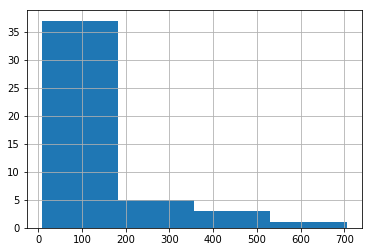

In [55]:
import matplotlib.pyplot as plt

print(sg_venues['total likes'].max())
print(sg_venues['total likes'].min())
print(sg_venues['total likes'].median())
print(sg_venues['total likes'].mean())

sg_venues['total likes'].hist(bins=4)
plt.show()

### Categorizing the different restaurants

In [56]:
# Bins we are using

print(np.percentile(sg_venues['total likes'], 20))
print(np.percentile(sg_venues['total likes'], 45))
print(np.percentile(sg_venues['total likes'], 60))


31.0
70.75
94.0


## Categorizing the restaurants based on the percentile of likes


In [57]:
# Setting bins to their respective ranges
# less than 24, 24-45, 45-76, 76>
# poor, below avg, abv avg, great

poor = sg_venues['total likes']<=24
below_avg = sg_venues[(sg_venues['total likes']>24) & (sg_venues['total likes']<=45)]
abv_avg = sg_venues[(sg_venues['total likes']>45) & (sg_venues['total likes']<=76)]
great = sg_venues['total likes']>76


def conditions(s):
    if s['total likes']<=24:
        return 'poor'
    if s['total likes']<=45:
        return 'below avg'
    if s['total likes']<=76:
        return 'abv avg'
    if s['total likes']>76:
        return 'great'

sg_venues['total likes_cat']= sg_venues.apply(conditions, axis=1)
sg_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277,34,below avg
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835,30,below avg
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028,70,abv avg
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011,36,below avg
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825,29,below avg
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832,42,below avg
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811,705,great
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988,13,poor
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374,527,great
11,Creamier Ice Cream And Coffee,4e9fb0b46c258f17cb31f906,Ice Cream Shop,1.337411,103.844086,227,great


In [58]:
 # Creating new categories to obtain a function to apply to existing data

Asian_cuisine = ['Japanese Restaurant', 'Sushi Restaurant', 'Dumpling Restaurant', 'Asian Restaurant', 'Ramen Restaurant', 
                'Indian Restaurant', 'Vietnamese Restaurant', 'Chinese Restaurant', 'Cantonese Restaurant']
Bars = ['Cocktail Bar', 'Bar', 'Whisky Bar']
Cafe = ['Café']
European_cuisine = ['French Restaurant', 'Italian Restaurant']
Middle_east_cuisine = ['Middle Eastern Restaurant']
Steakhouse = ['Steakhouse']
Others = ['Coffee Shop', 'Buffet', 'Peruvian Restaurant', 'Bakery', 'Ice Cream Shop', 'Dessert Shop', 'Vegetarian / Vegan Restaurant',
         'Food Court']

def conditions2(s):
    if s['categories'] in Asian_cuisine:
        return 'Asian Cuisine'
    if s['categories'] in Bars:
        return 'Bars'
    if s['categories'] in Cafe:
        return 'Cafe'
    if s['categories'] in European_cuisine:
        return 'European Cuisine'
    if s['categories'] in Middle_east_cuisine:
        return 'Middle East Cuisine'
    if s['categories'] in Steakhouse:
        return 'American food'
    if s['categories'] in Others:
        return 'Others'

sg_venues['categories_new']= sg_venues.apply(conditions2, axis=1)
sg_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277,34,below avg,Others
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835,30,below avg,Asian Cuisine
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028,70,abv avg,Asian Cuisine
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011,36,below avg,Asian Cuisine
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825,29,below avg,Asian Cuisine
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832,42,below avg,Others
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811,705,great,Others
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988,13,poor,Asian Cuisine
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374,527,great,Others
11,Creamier Ice Cream And Coffee,4e9fb0b46c258f17cb31f906,Ice Cream Shop,1.337411,103.844086,227,great,Others


## Creating Dummy Variables To Allow for Clustering

In [59]:
# One hot encoding
sg_onehot = pd.get_dummies(sg_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
sg_onehot['Name'] = sg_venues['name'] 

# Move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot

,Name,American food,Asian Cuisine,Bars,Cafe,European Cuisine,Middle East Cuisine,Others,abv avg,below avg,great,poor
0,Alfero Gelato,0,0,0,0,0,0,1,0,1,0,0
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,0,1,0,0,0,0,0,0,1,0,0
2,Boon Tong Kee 文东记,0,1,0,0,0,0,0,1,0,0,0
4,Tandoori Corner,0,1,0,0,0,0,0,0,1,0,0
5,Sik Bao Sin (Desmond's Creations),0,1,0,0,0,0,0,0,1,0,0
6,"""Combat"" Top Quality Durian",0,0,0,0,0,0,1,0,1,0,0
7,Old Airport Road Food Centre,0,0,0,0,0,0,1,0,0,1,0
8,Dian Xiao Er 店小二,0,1,0,0,0,0,0,0,0,0,1
9,Chye Seng Huat Hardware Coffee Bar,0,0,0,0,0,0,1,0,0,1,0
11,Creamier Ice Cream And Coffee,0,0,0,0,0,0,1,0,0,1,0


## Running of K-Means Algorithms to Obtain Labels

In [60]:
cluster_df = sg_onehot.drop('Name', axis=1)

k_clusters = 4

# Run k-means clustering
kmeans = KMeans(n_clusters = k_clusters, random_state=0).fit(cluster_df)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]


array([3, 2, 1, 2, 2, 3, 0, 2, 0, 0, 0, 2, 2, 3, 1, 0, 1, 1, 0, 1],
      dtype=int32)

## Adding Cluster Labels Back Into Original Dataframe

In [61]:
sg_venues['label'] = kmeans.labels_
sg_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277,34,below avg,Others,3
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835,30,below avg,Asian Cuisine,2
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028,70,abv avg,Asian Cuisine,1
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011,36,below avg,Asian Cuisine,2
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825,29,below avg,Asian Cuisine,2
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832,42,below avg,Others,3
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811,705,great,Others,0
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988,13,poor,Asian Cuisine,2
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374,527,great,Others,0
11,Creamier Ice Cream And Coffee,4e9fb0b46c258f17cb31f906,Ice Cream Shop,1.337411,103.844086,227,great,Others,0


## Visualizing What The 4 Food Clusters Look Like For Singapore

In [62]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sg_venues['lat'], sg_venues['lng'], sg_venues['name'], sg_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### As you can observe, most of the restaurants are located in the south of the island, this is understandable as most tourists will stay in the south. However again, this is not representative of the actual facts. There are many nice restaurants in different parts of the island. If you have 3 days in Singapore, you can't even finish this list in the south, let alone try the restaurants in other areas. These places will be more convenient for you to explore. 

### Cluster 1

In [63]:
sg_venues.loc[sg_venues['label']==0]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
7,Old Airport Road Food Centre,4b0bcea6f964a520c93323e3,Food Court,1.308171,103.885811,705,great,Others,0
9,Chye Seng Huat Hardware Coffee Bar,50227b21e4b02e5c64efc45d,Coffee Shop,1.311675,103.860374,527,great,Others,0
11,Creamier Ice Cream And Coffee,4e9fb0b46c258f17cb31f906,Ice Cream Shop,1.337411,103.844086,227,great,Others,0
12,Druggists,54ccdb92498eeb9f4153347e,Bar,1.311227,103.859830,123,great,Bars,0
18,ATLAS Bar,585a1ef68ee5606a98d90f21,Cocktail Bar,1.299965,103.857768,193,great,Bars,0
23,Cicheti,51fb8ad5498ec467c6e817e4,Italian Restaurant,1.301707,103.860062,112,great,European Cuisine,0
29,Komala Vilas Restaurant,4b058813f964a5204cb022e3,Vegetarian / Vegan Restaurant,1.306523,103.851848,141,great,Others,0
33,Tom's Palette,4bd811e909ecb7133ffc477c,Ice Cream Shop,1.296079,103.856757,147,great,Others,0
52,edge | food theatre,5052db48e4b0359ed4970086,Buffet,1.291870,103.859241,103,great,Others,0
58,Artichoke Café + Bar,4c6f6103df6b8cfa1342b54d,Middle Eastern Restaurant,1.299678,103.851978,210,great,Middle East Cuisine,0


#### As we can see, they are mostly restaurants or food that are not Asians. My assumption is that the majority of the votes came from tourists. With one exception that might come from locals as well: Old Airport Road Food Centre. It was actually one of the place that I would recommend you going. This place offers local authentic food at amazing prices. In addition, they serve a heavenly plethora of different food, and beverages. And it tastes so good. I live in the north, but sometimes, I just take a 1 hour train ride just to have my meal there. BECAUSE IT IS AMAZING, so if you are a tourist and you just have time to go to a place, go for that. Although the label is 'Food Court', it is actually a hawker centre. I will provide you some photos of the food below. 


![alt text](https://mtc1-dydfxmh.netdna-ssl.com/wp-content/uploads/2017/07/old-airport-road-e1501210275507.jpg "Logo Title Text 2") 
 
![alt text](https://farm5.staticflickr.com/4316/36045502692_34cb77013c_b.jpg "Logo Title Text 1")

![alt text](https://farm5.staticflickr.com/4292/35376318724_6290da6a74_b.jpg "Logo Title Text 3")

![alt text](https://farm5.staticflickr.com/4316/36045502572_af384cb347_b.jpg "Logo Title Text 3")

Even I am getting hungry now. The picture of the roasted pork is really the BOMB!

### Cluster 2

In [64]:
sg_venues.loc[sg_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,Boon Tong Kee 文东记,4b9b68a5f964a5208a0536e3,Chinese Restaurant,1.319819,103.862028,70,abv avg,Asian Cuisine,1
17,Loving Hut,52d0b63811d2fd7c68dde58d,Vegetarian / Vegan Restaurant,1.311118,103.901190,69,abv avg,Others,1
20,Birds of Paradise Gelato Boutique,5794bbb9498eaba989965ceb,Ice Cream Shop,1.305051,103.903787,67,abv avg,Others,1
21,Murugan Idli Shop,4b2c6299f964a52088c624e3,Indian Restaurant,1.308842,103.856380,74,abv avg,Asian Cuisine,1
24,Ah Chew Desserts 阿秋甜品 (Ah Chew Desserts),53492538498e0f29cc1f4da9,Dessert Shop,1.318411,103.843714,49,abv avg,Others,1
27,Sin Ming Roti Prata (Faisal & Aziz Curry Musli...,4b584116f964a520c14f28e3,Indian Restaurant,1.355269,103.836719,75,abv avg,Asian Cuisine,1
28,Sari Ratu Restaurant,4fdaf746e4b0bcab80d803b7,Indonesian Restaurant,1.302145,103.861258,47,abv avg,None,1
47,The Auld Alliance,4db1a2035da32cf2df60580b,Whisky Bar,1.298567,103.848903,58,abv avg,Bars,1
50,Colony,55f9641d498eaceb29f0e5bb,Buffet,1.290697,103.859914,63,abv avg,Others,1
74,JAAN,4b058813f964a5203ab022e3,French Restaurant,1.293161,103.853583,75,abv avg,European Cuisine,1


#### I have tried the one at the top: Boon Tong Kee. It is excellent as well.

### Cluster 3

In [65]:
sg_venues.loc[sg_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
1,Ser Seng Herbs (Turtle) Restaurant 生成山瑞補品,4bc2ebfc4cdfc9b645a49621,Chinese Restaurant,1.328688,103.869835,30,below avg,Asian Cuisine,2
4,Tandoori Corner,4b3af9cbf964a520197025e3,Indian Restaurant,1.325778,103.850011,36,below avg,Asian Cuisine,2
5,Sik Bao Sin (Desmond's Creations),525a573711d2af3d09ec3024,Cantonese Restaurant,1.314241,103.887825,29,below avg,Asian Cuisine,2
8,Dian Xiao Er 店小二,54017053498ed9078533b8cd,Chinese Restaurant,1.350426,103.848988,13,poor,Asian Cuisine,2
14,MTR 1924,51a2af4d498ec025802f527d,Indian Restaurant,1.312973,103.856371,91,great,Asian Cuisine,2
15,Long Phung Vietnamese Restaurant,4b3dd5fbf964a520039725e3,Vietnamese Restaurant,1.312703,103.900227,195,great,Asian Cuisine,2
44,Singapore Zam Zam Restaurant,4b86050ef964a520b17d31e3,Indian Restaurant,1.302030,103.858548,526,great,Asian Cuisine,2
46,Ramen Keisuke Tonkotsu King Four Seasons,5187c434498e1a1f7d3537b2,Ramen Restaurant,1.301017,103.855381,176,great,Asian Cuisine,2
55,Seng Kee Black Chicken Herbal Soup Bedok North...,4c613f0e13791b8d956051af,Asian Restaurant,1.333087,103.930373,11,poor,Asian Cuisine,2
56,Tatsuya Japanese Restaurant,4b6ee15ff964a520c1ce2ce3,Japanese Restaurant,1.308391,103.833997,96,great,Asian Cuisine,2


#### Zam Zam is halal Malay-Indian food, which is amazing, Din Tai Fung originated from Taiwan. Both are amazing too. This list comprises Asian food. As you can observe, Zam Zam & Din Tai Fung have amazing reviews, but because of the clusters, they are being grouped in the third cluster. There will be errors if the sole dependence is on the machine to provide recommendations. I am here to tell you that Zam Zam, Ramen Keisuke and Din Tai Fung are nice restaurants, you can try it.

In [66]:
sg_venues.loc[sg_venues['label']== 3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Alfero Gelato,4ea3aae86c25b62f3deaf9a6,Ice Cream Shop,1.331804,103.886277,34,below avg,Others,3
6,"""Combat"" Top Quality Durian",4df8d37ae4cd2129701b3ce8,Dessert Shop,1.321567,103.852832,42,below avg,Others,3
16,Creamery Boutique Ice Creams,58439dd68ae36321dbe450e7,Ice Cream Shop,1.311457,103.860193,25,below avg,Others,3
31,Chocolat N' Spice,4d1948f3e190721e56692821,Bakery,1.351867,103.837558,11,poor,Others,3
40,Brawn & Brains,5bca9b8b340a58002cd42dd5,Coffee Shop,1.307506,103.907293,9,poor,Others,3
45,Pullman Bakery,4c957b9c1582952195fa23a8,Bakery,1.293822,103.859783,33,below avg,Others,3
48,Tono Cevicheria,595ceaf21fa763146ae589e6,Peruvian Restaurant,1.299181,103.858189,22,poor,Others,3
82,Kurasu,595b27ae8e886a485ccb3fa2,Coffee Shop,1.295947,103.853430,31,below avg,Others,3


## Further Extras
Wing Seong Fatty's Restaurant is a cluster 1 for me.
Han Kee Fish Soup is excellent as well if you are into fish soup noodles.
The buffett at Tong Le private Dining serves good quality food for its prices as well. Just try to go during lunch weekdays, I think, it's cheaper then.

#### As I have mentioned earlier, the above restaurants are merely a small sample of what is amazing in Singapore, if you have months, then I suggest you try to venture away from the south. If you are a really food-explorer, you can check out reviews of the list below. There are thousands of hawker centres all around Singapore for you to try. 

In [76]:
df = pd.read_csv('hawker_centres.csv')
df. head()

,name_of_centre,location_of_centre,type_of_centre,owner,no_of_stalls,no_of_cooked_food_stalls,no_of_mkt_produce_stalls
0,Adam Road Food Centre,"2, Adam Road, S(289876)",HC,Government,32,32,0
1,Amoy Street Food Centre,"National Development Building, Annex B, Telok ...",HC,Government,135,134,1
2,Bedok Food Centre,"1, Bedok Road, S(469572)",HC,Government,32,32,0
3,Beo Crescent Market,"38A, Beo Crescent, S(169982)",MHC,Government,94,32,62
4,Berseh Food Centre,"166, Jalan Besar, S(208877)",HC,Government,66,66,0


In [79]:
df = df.sort_values(['no_of_stalls'], ascending = False)
df.head(20)

,name_of_centre,location_of_centre,type_of_centre,owner,no_of_stalls,no_of_cooked_food_stalls,no_of_mkt_produce_stalls
100,Chinatown Market,"Blk 335, Smith Street, S(050335)",MHC,HDB,703,226,477
106,Tekka Market,"Blk 665, Buffalo Road, S(210665)",MHC,HDB,403,119,284
10,Geylang Serai Market,"Geylang Serai, S(402001)",MHC,Government,365,63,302
23,Tiong Bahru Market,"30, Seng Poh Road, S(168898)",MHC,Government,342,83,259
26,Albert Centre Market & Food Centre,"Blk 270, Queen Street, S(180270)",MHC,HDB,234,86,148
40,Blk 20 Ghim Moh Road,"Blk 20, Ghim Moh Road, S(270020)",MHC,HDB,230,72,158
51,Blk 347 Jurong East Ave 1,"Blk 347, Jurong East Ave 1, S(600347)",MHC,HDB,225,56,169
11,Golden Mile Food Centre,"505, Beach Road, S(199583)",MHC,Government,223,112,111
58,Blk 453A Ang Mo Kio Ave 10,"Blk 453A, Ang Mo Kio Ave 10, S(561453)",MHC,HDB,222,38,184
67,Blk 51 Old Airport Road,"Blk 51, Old Airport Road, S(390051)",MHC,HDB,222,168,54


### The top 2 hawker centres are huge, and they are also at the cultural heritages of Singapore. The first one is at Chinatown, obviously. So besides food, you can explore the surroundings. If you are really cool, go talk to the locals. There is a higher percentage that people there are from China, compared to other areas from Singapore. There are a lot of senior citizens there as well because they have settled in that area before Singapore became prosperous. It is pretty expensive to buy a home there nowadays.
### The second one is at Little India, another recommendation from me if you got to Little India is to go to Anandha  Bhavan at 10 Buffalo Road. The vegetarian food is amazing. Try the Ghee Thosai. I have encountered, several times, where Indians from India have complemented the manager and told him that it is rare, even in India to find such delicious Indian food.



We have come to the end of this food journey together and I hope you have enjoyed this session. Thank you !